In [1]:
cd ..

/Users/muhammadfarooq/Codebase/thesis-experiment/Pith2Bark


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")

import json
import numpy as np
import matplotlib.pyplot as plt

import cv2
import tensorflow as tf

In [3]:
model = tf.keras.models.load_model('PithDetector')

In [4]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 3,290,266
Non-trainable params: 761,867
_____________________________________________

In [5]:
print(model.summary(expand_nested=True))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_1 (InputLayer)      [(None, 224, 224, 3)]     0         |
|                                                               |
| rescaling (Rescaling)     (None, 224, 224, 3)       0         |
|                                                               |
| normalization (Normalizatio  (None, 224, 224, 3)    7         |
| n)                                                            |
|                                                               |
| stem_conv_pad (ZeroPadding2  (None, 225, 225, 3)    0         |
| D)                                                         

| block2b_project_conv (Conv2  (None, 56, 56, 24)     3456      |
| D)                                                            |
|                                                               |
| block2b_project_bn (BatchNo  (None, 56, 56, 24)     96        |
| rmalization)                                                  |
|                                                               |
| block2b_drop (Dropout)    (None, 56, 56, 24)        0         |
|                                                               |
| block2b_add (Add)         (None, 56, 56, 24)        0         |
|                                                               |
| block3a_expand_conv (Conv2D  (None, 56, 56, 144)    3456      |
| )                                                             |
|                                                               |
| block3a_expand_bn (BatchNor  (None, 56, 56, 144)    576       |
| malization)                                                   |
|         

| block4a_project_conv (Conv2  (None, 14, 14, 80)     19200     |
| D)                                                            |
|                                                               |
| block4a_project_bn (BatchNo  (None, 14, 14, 80)     320       |
| rmalization)                                                  |
|                                                               |
| block4b_expand_conv (Conv2D  (None, 14, 14, 480)    38400     |
| )                                                             |
|                                                               |
| block4b_expand_bn (BatchNor  (None, 14, 14, 480)    1920      |
| malization)                                                   |
|                                                               |
| block4b_expand_activation (  (None, 14, 14, 480)    0         |
| Activation)                                                   |
|                                                               |
| block4b_

| block5b_expand_conv (Conv2D  (None, 14, 14, 672)    75264     |
| )                                                             |
|                                                               |
| block5b_expand_bn (BatchNor  (None, 14, 14, 672)    2688      |
| malization)                                                   |
|                                                               |
| block5b_expand_activation (  (None, 14, 14, 672)    0         |
| Activation)                                                   |
|                                                               |
| block5b_dwconv (DepthwiseCo  (None, 14, 14, 672)    16800     |
| nv2D)                                                         |
|                                                               |
| block5b_bn (BatchNormalizat  (None, 14, 14, 672)    2688      |
| ion)                                                          |
|                                                               |
| block5b_

| block6b_expand_bn (BatchNor  (None, 7, 7, 1152)     4608      |
| malization)                                                   |
|                                                               |
| block6b_expand_activation (  (None, 7, 7, 1152)     0         |
| Activation)                                                   |
|                                                               |
| block6b_dwconv (DepthwiseCo  (None, 7, 7, 1152)     28800     |
| nv2D)                                                         |
|                                                               |
| block6b_bn (BatchNormalizat  (None, 7, 7, 1152)     4608      |
| ion)                                                          |
|                                                               |
| block6b_activation (Activat  (None, 7, 7, 1152)     0         |
| ion)                                                          |
|                                                               |
| block6b_

|                                                               |
| block7a_expand_activation (  (None, 7, 7, 1152)     0         |
| Activation)                                                   |
|                                                               |
| block7a_dwconv (DepthwiseCo  (None, 7, 7, 1152)     10368     |
| nv2D)                                                         |
|                                                               |
| block7a_bn (BatchNormalizat  (None, 7, 7, 1152)     4608      |
| ion)                                                          |
|                                                               |
| block7a_activation (Activat  (None, 7, 7, 1152)     0         |
| ion)                                                          |
|                                                               |
| block7a_se_squeeze (GlobalA  (None, 1152)           0         |
| veragePooling2D)                                              |
|         

In [6]:
print(model.layers[1].summary())

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 56, 56, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_a

 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
          

                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_s

 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 14, 14, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_a

                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 7, 7, 1152)  10368       ['block7a_expand_activation[0][0]
 D)       

In [7]:
for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')

0 <keras.engine.input_layer.InputLayer object at 0x13c44d0d0>
   no activation attribute
1 <keras.engine.functional.Functional object at 0x11d3b7130>
   no activation attribute
2 <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x130149af0>
   no activation attribute
3 <keras.layers.regularization.dropout.Dropout object at 0x11d3b5910>
   no activation attribute
4 <keras.layers.core.dense.Dense object at 0x11d3b55b0>
     <function sigmoid at 0x13bd46b80>


In [8]:
nested_model = model.layers[1]

for i, layer in enumerate (nested_model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')

0 <keras.engine.input_layer.InputLayer object at 0x11d3acf40>
   no activation attribute
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x11d3acb20>
   no activation attribute
2 <keras.layers.preprocessing.normalization.Normalization object at 0x106f5afd0>
   no activation attribute
3 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x106f5aaf0>
   no activation attribute
4 <keras.layers.convolutional.conv2d.Conv2D object at 0x13c480700>
     <function linear at 0x13bd4a0d0>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x13c4a11c0>
   no activation attribute
6 <keras.layers.core.activation.Activation object at 0x13c4a18b0>
     <function swish at 0x13bd464c0>
7 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x13c5e90a0>
     <function linear at 0x13bd4a0d0>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x13c5e9760>
   no activation attribute
9 <keras.layers.co

In [9]:
# Print the details of each layer in the loaded model
for layer in model.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Layer Type: {type(layer).__name__}")
    print(f"Layer Output Shape: {layer.output_shape}")
    print(f"Number of Layer Parameters: {layer.count_params()}\n")

Layer Name: input_2
Layer Type: InputLayer
Layer Output Shape: [(None, 224, 224, 3)]
Number of Layer Parameters: 0

Layer Name: efficientnetb0
Layer Type: Functional
Layer Output Shape: (None, 7, 7, 1280)
Number of Layer Parameters: 4049571

Layer Name: global_average_pooling2d
Layer Type: GlobalAveragePooling2D
Layer Output Shape: (None, 1280)
Number of Layer Parameters: 0

Layer Name: dropout
Layer Type: Dropout
Layer Output Shape: (None, 1280)
Number of Layer Parameters: 0

Layer Name: dense
Layer Type: Dense
Layer Output Shape: (None, 2)
Number of Layer Parameters: 2562



In [10]:
model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'},
   'name': 'input_2',
   'inbound_nodes': []},
  {'class_name': 'Functional',
   'config': {'name': 'efficientnetb0',
    'layers': [{'class_name': 'InputLayer',
      'config': {'batch_input_shape': (None, 224, 224, 3),
       'dtype': 'float32',
       'sparse': False,
       'ragged': False,
       'name': 'input_1'},
      'name': 'input_1',
      'inbound_nodes': []},
     {'class_name': 'Rescaling',
      'config': {'name': 'rescaling',
       'trainable': False,
       'dtype': 'float32',
       'scale': 0.00392156862745098,
       'offset': 0.0},
      'name': 'rescaling',
      'inbound_nodes': [[['input_1', 0, 0, {}]]]},
     {'class_name': 'Normalization',
      'config': {'name': 'normalization',
       'trainable': False,
       'dtype': 'float32',
       'axis': (3,),
  

In [11]:
history = model.history
history

In [12]:
print(model.loss)

print(model.metrics)
print(model.metrics_names)

print(model.optimizer)
print(model.optimizer.get_config())

<function mean_squared_error at 0x13938ad30>
[<keras.metrics.base_metric.Mean object at 0x140683940>, <keras.metrics.metrics.MeanSquaredError object at 0x14082cc10>]
['loss', 'mean_squared_error']
{'name': 'Adam', 'learning_rate': 1.0941898835881148e-05, 'decay': 0.0, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'epsilon': 1e-07, 'amsgrad': False}


# VALIDATE

In [13]:
IMG_SIZE = 224 # Image resolution

In [14]:
def get_image_path(directory, image_name):
    return os.path.join(directory, image_name)

In [15]:
with open(r'data/Log_Ends_Train.json', 'r') as f:
    PITH_JSON_TRAIN = json.load(f)
    
with open(r'data/Log_Ends_Val.json', 'r') as f:
    PITH_JSON_VAL = json.load(f)

In [16]:
def get_bbox(image_name, json_file):
    for image_item in json_file["images"]:
        if image_item["image_name"] == image_name:
            return image_item["labels"][0]["bbox"]
    return None

def get_xy_coordinates(image, image_name, json_file):
    x,y,w,h = get_bbox(image_name, json_file)
    w = np.abs(w-x)
    h = np.abs(h-y)
    height, width = image.shape[0], image.shape[1]
    return (x + w/2)/width, (y + h/2)/height

In [17]:
#STOP

In [18]:
labels_Log_Ends_Train = []
images_Log_Ends_Train = []
for image_item in PITH_JSON_TRAIN["images"]:
    image_name = image_item["image_name"]
    image_path = get_image_path(r'data/Log_Ends_Train', image_name)
    image = plt.imread(image_path)
    labels_Log_Ends_Train.append(get_xy_coordinates(image, image_name, PITH_JSON_TRAIN)) 
    images_Log_Ends_Train.append(image)

labels_Log_Ends_Val = []
images_Log_Ends_Val = []
for image_item in PITH_JSON_VAL["images"]: 
    image_name = image_item["image_name"]
    image_path = get_image_path(r'data/Log_Ends_Val', image_name)
    image = plt.imread(image_path)
    labels_Log_Ends_Val.append(get_xy_coordinates(image, image_name, PITH_JSON_VAL))
    images_Log_Ends_Val.append(image)

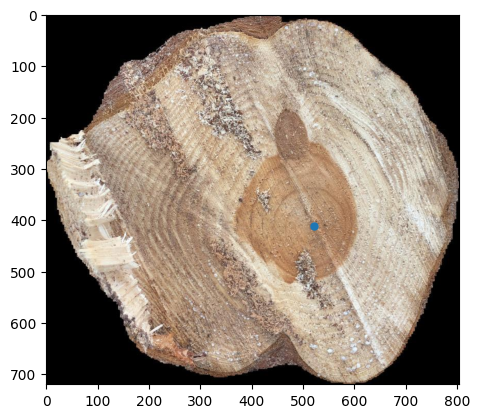

In [19]:
prediction = labels_Log_Ends_Train[0]
img = images_Log_Ends_Train[0]
height, width = img.shape[0], img.shape[1]
plt.imshow(img)
plt.plot(prediction[0]*width, prediction[1]*height, '.', markersize = 10)
plt.show()

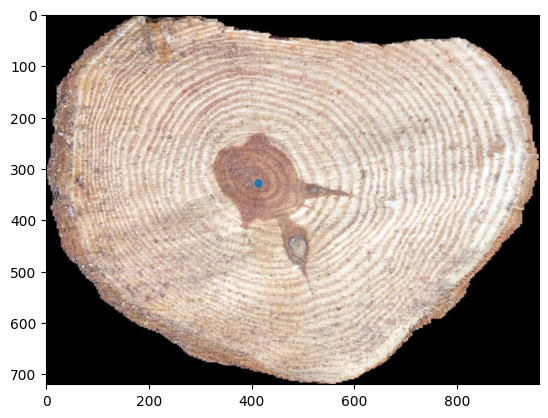

In [20]:
prediction =labels_Log_Ends_Val[0]
img = images_Log_Ends_Val[0]
height, width = img.shape[0], img.shape[1]
plt.imshow(img)
plt.plot(prediction[0]*width, prediction[1]*height, '.', markersize = 10)
plt.show()

In [21]:
resized_images_Log_Ends_Train = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in images_Log_Ends_Train]
resized_images_Log_Ends_Val = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in images_Log_Ends_Val]

X_train = np.array(resized_images_Log_Ends_Train)
y_train = np.array(labels_Log_Ends_Train)

X_holdout = np.array(resized_images_Log_Ends_Val)
y_holdout = np.array(labels_Log_Ends_Val)

In [22]:
results = model.evaluate(X_holdout, y_holdout)

loss, mse = model.evaluate(X_holdout, y_holdout)
print('Loss on holdout set:', loss)
print('MSE on holdout set:', mse)

2/2 [==============================] - 1s 523ms/step - loss: 2.4084e-04 - mean_squared_error: 2.4084e-04
Loss on holdout set: 0.00024083649623207748
MSE on holdout set: 0.00024083649623207748


1/1 [==============================] - 2s 2s/step


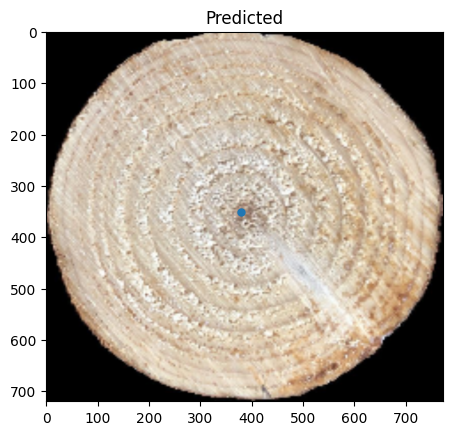

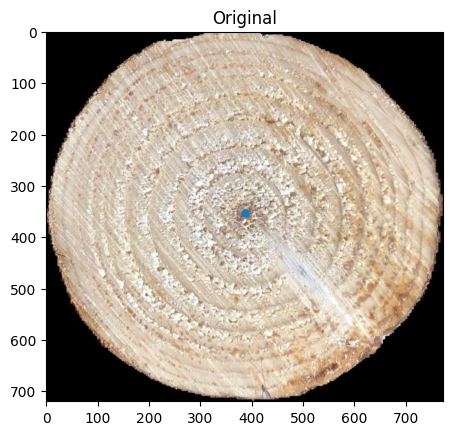

In [23]:
img_ind = 1

image = images_Log_Ends_Train[img_ind]
height, width = image.shape[0], image.shape[1]
image = cv2.resize(image, (224,224))
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)[0]
image = np.squeeze(image, axis = 0)
image = cv2.resize(image, (width, height))
plt.imshow(image)
plt.plot(prediction[0]*width, prediction[1]*height, '.', markersize = 10)
plt.title("Predicted")
plt.show()

prediction = labels_Log_Ends_Train[img_ind]
img = images_Log_Ends_Train[img_ind]
height, width = img.shape[0], img.shape[1]
plt.imshow(img)
plt.plot(prediction[0]*width, prediction[1]*height, '.', markersize = 10)
plt.title("Original")
plt.show()

1/1 [==============================] - 0s 63ms/step


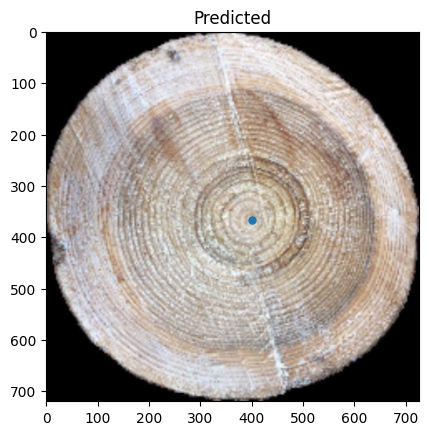

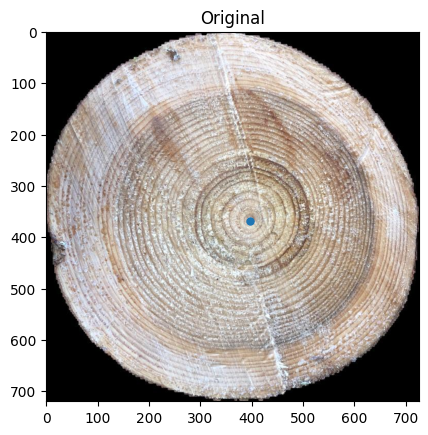

In [24]:
img_ind = 1


image = images_Log_Ends_Val[1]
height, width = image.shape[0], image.shape[1]
image = cv2.resize(image, (224,224))
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)[0]
image = np.squeeze(image, axis = 0)
image = cv2.resize(image, (width, height))
plt.imshow(image)
plt.plot(prediction[0]*width, prediction[1]*height, '.', markersize = 10)
plt.title("Predicted")
plt.show()

prediction = labels_Log_Ends_Val[img_ind]
img = images_Log_Ends_Val[img_ind]
height, width = img.shape[0], img.shape[1]
plt.imshow(img)
plt.plot(prediction[0]*width, prediction[1]*height, '.', markersize = 10)
plt.title("Original")
plt.show()

In [25]:
#STOP